In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/modelling_mpg.csv')
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1


In [3]:
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression()

In [8]:
model.intercept_

79.80442103966975

In [9]:
coef_parem = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficent'])
coef_parem

,Coefficent
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [10]:
y_pred = model.predict(X_test)

In [11]:
dict = {'Actual : ': y_test, ' Predict : ': y_pred}
compare = pd.DataFrame(dict)
compare.sample(8)

,Actual :,Predict :
113,26.0,26.592685
132,16.0,17.279368
25,10.0,7.449357
353,31.6,31.340354
167,20.0,22.314063
82,28.0,24.147781
208,19.0,25.676064
0,18.0,15.016313


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [13]:
def evualvation_metrics(y_test, y_pred):
    SCORE = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    return print(f" MSE = {MSE}\n RMSE = {RMSE}\n MAE = {MAE}\n Score = {SCORE}")

In [14]:
evualvation_metrics(y_test, y_pred)

 MSE = 11.237861022823017
 RMSE = 3.3522919059686638
 MAE = 2.5188281576150855
 Score = 0.7798249880881916


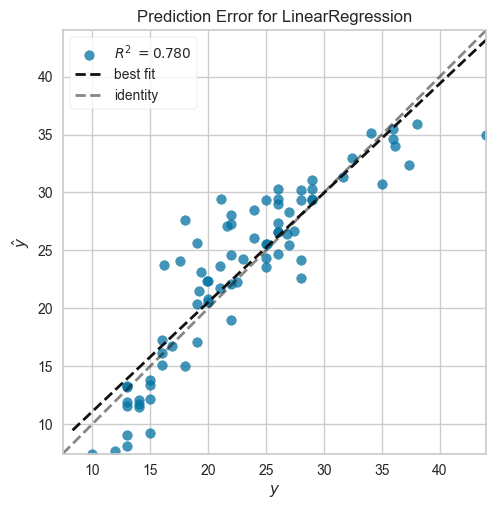

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [15]:
from yellowbrick.regressor import PredictionError

visual = PredictionError(model)
visual.fit(X_train, y_train)
visual.score(X_test, y_test)

visual.show()

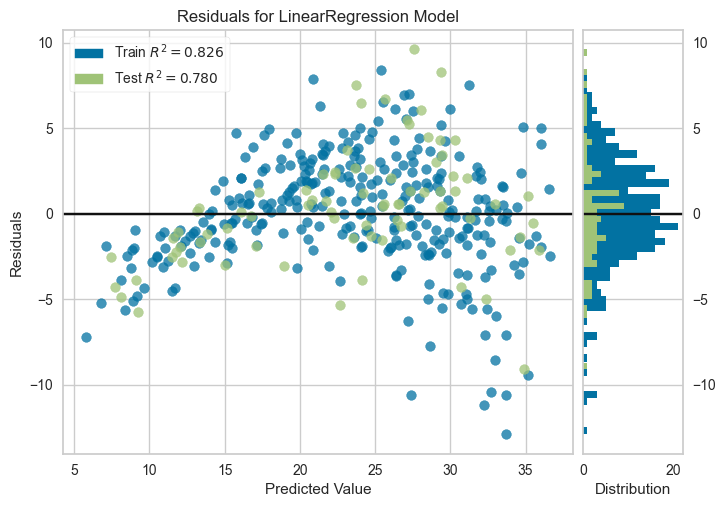

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [16]:
from yellowbrick.regressor import ResidualsPlot

visual = ResidualsPlot(model)
visual.fit(X_train, y_train)
visual.score(X_test, y_test)

visual.show()